<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/Natural_Language_Processing/lessons/w3_lesson1b_multilayer_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.4.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteG8KD05/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteG8KD05/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteG8KD05/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs = NUM_EPOCHS, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 115s 268ms/step - loss: 0.6107 - accuracy: 0.6373 - val_loss: 0.4910 - val_accuracy: 0.7885
Epoch 2/10
391/391 [==============================] - 104s 265ms/step - loss: 0.4810 - accuracy: 0.7818 - val_loss: 0.4690 - val_accuracy: 0.7977
Epoch 3/10
391/391 [==============================] - 104s 265ms/step - loss: 0.4467 - accuracy: 0.7914 - val_loss: 0.4482 - val_accuracy: 0.7895
Epoch 4/10
391/391 [==============================] - 104s 265ms/step - loss: 0.4389 - accuracy: 0.7953 - val_loss: 0.6149 - val_accuracy: 0.6481
Epoch 5/10
391/391 [==============================] - 104s 264ms/step - loss: 0.4706 - accuracy: 0.7749 - val_loss: 0.5413 - val_accuracy: 0.7393
Epoch 6/10
391/391 [==============================] - 104s 265ms/step - loss: 0.3648 - accuracy: 0.8398 - val_loss: 0.5796 - val_accuracy: 0.7290
Epoch 7/10
391/391 [==============================] - 104s 265ms/step - loss: 0.3305 - accuracy: 0.8661 - val_loss: 0.4157 -

In [8]:
import matplotlib.pyplot as plt

def plot_graph(history, string):

  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

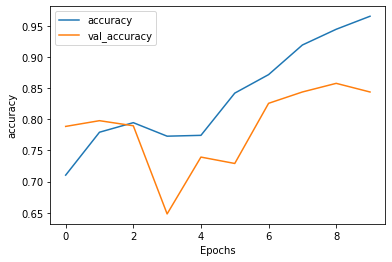

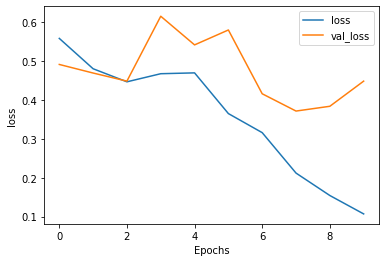

In [9]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')